In [18]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

# Define the PostgreSQL connection URL
# Replace the placeholders with your database credentials
username = 'postgres'
password = 'postgres'
host = 'Localhost'  # Use 'localhost' or the appropriate host IP
port = '5432'  # Default port for PostgreSQL
database_name = 'Crowdfunding_DB'

# Create the connection URL
connection_str = f"postgresql://{username}:{password}@{host}:{port}/{database_name}"

# Create an SQLAlchemy engine
engine = create_engine(connection_str)


In [19]:
session = Session(engine)
conn = engine.connect()

In [67]:
# Define your query
query = text("""SELECT c.company_name, c.pledged, c.goal, c.backers_count
                FROM campaign c
                ORDER BY pledged DESC;""")

# Execute the query using session
result = session.execute(query)

# Convert result into DataFrame
df1 = pd.DataFrame(result.fetchall(), columns=result.keys())

# Display the DataFrame
df1

,company_name,pledged,goal,backers_count
0,Jackson Inc,199110.0,196900.0,2053
1,Jordan-Acosta,198628.0,173800.0,2283
2,Perez Group,197728.0,63400.0,2038
3,Smith-Wallace,197024.0,110300.0,2346
4,"Hicks, Wall and Webb",197018.0,174500.0,2526
...,...,...,...,...
995,Ramos and Sons,1.0,100.0,1
996,Wallace LLC,1.0,100.0,1
997,"Hood, Perez and Meadows",1.0,100.0,1
998,Valdez Ltd,0.0,100.0,0


In [79]:

  query = text("""
    SELECT c.company_name, c.end_date
    FROM campaign c
    ORDER BY c.end_date;
""")


df = pd.read_sql(query, con=engine)

# Step 3: Check for null values and handle them
# Convert 'end_date' to datetime, coercing errors to NaT (Not a Time)
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Step 6: Set 'end_date' as the index
df.set_index('end_date', inplace=True)

# Step 7: Aggregate the data by month (optional, depending on your use case)
# Count the number of campaigns per month
campaigns_per_month = df.resample('M').size()

C:\Users\vsanh\AppData\Local\Temp\ipykernel_22384\1908295071.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  campaigns_per_month = df.resample('M').size()


In [83]:
query = text("""
    SELECT c.category_id, cat.category, c.pledged
    FROM campaign c
    JOIN category cat ON c.category_id = cat.category_id
    WHERE c.pledged > 1500
""")

# Step 3: Load data into a DataFrame
df4 = pd.read_sql(query, con=engine)
category_counts = df4['category'].value_counts()

In [ ]:
#DATA VIZ

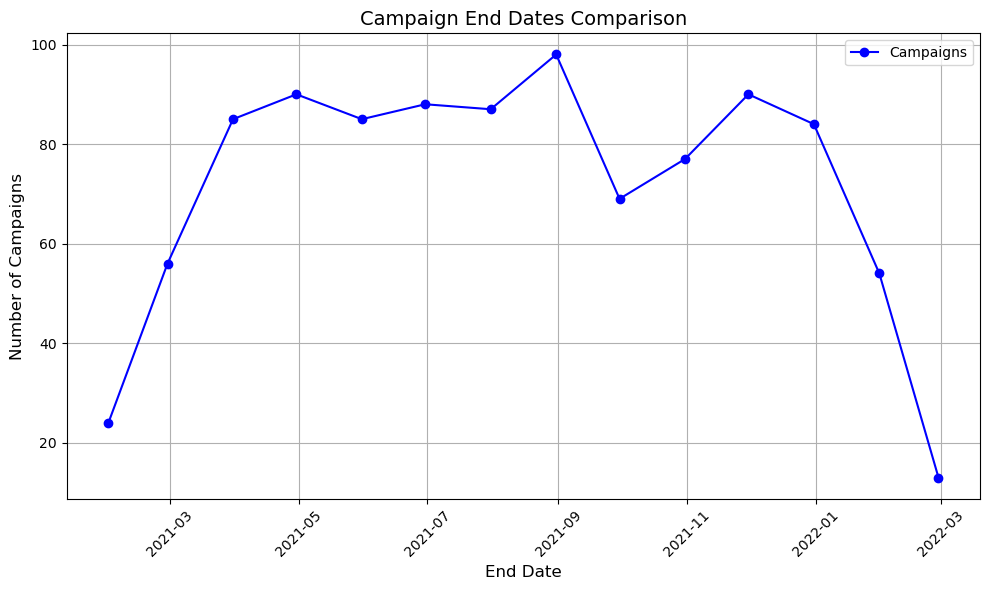

In [81]:
# Line chart of comparison of end dates
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(campaigns_per_month.index, campaigns_per_month.values, marker='o', linestyle='-', color='b', label='Campaigns')

# Step 9: Customize the plot
plt.title("Campaign End Dates Comparison", fontsize=14)
plt.xlabel("End Date", fontsize=12)
plt.ylabel("Number of Campaigns", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Step 10: Show the plot
plt.tight_layout()  # Adjusts the plot to make sure everything fits
plt.show()

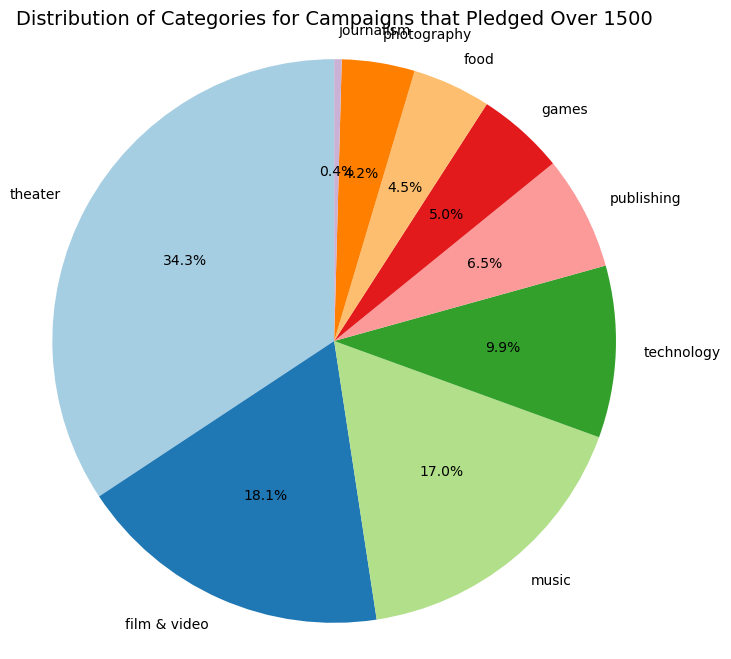

In [84]:
# Pie chart comparing categories that pledged over 1500
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Categories for Campaigns that Pledged Over 1500', fontsize=14)

# Step 6: Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()